Dataset : /content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)-20200808T101226Z-001/Machine Learning A-Z (Codes and Datasets)/Part 7 - Natural Language Processing/Section 36 - Natural Language Processing/Python/Restaurant_Reviews.tsv

#IMPORTING DATASETS

In [1]:
from google.colab import drive
drive.mount("/content/drive",force_remount="TRUE")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset= pd.read_csv("/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)-20200808T101226Z-001/Machine Learning A-Z (Codes and Datasets)/Part 7 - Natural Language Processing/Section 36 - Natural Language Processing/Python/Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [3]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


#DATA CLEANING

In [4]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub("[^a-zA-Z]"," ",dataset["Review"][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords=stopwords.words("english")
  all_stopwords.remove("not")
  review =  [ps.stem(word) for word in review if not word in set(all_stopwords)] 
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

#CREATING BAG OF WORDS MODEL

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values

In [7]:
len(x[0])

1500

#Splitting of the Dataset into Train and Test set

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

#Training the Naive Bayes model  on the training set

In [9]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#Predicting Test Set Result

In [10]:
y_pred=NB.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

#Confusion Matrix

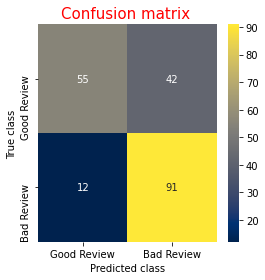

In [11]:
from sklearn.metrics import confusion_matrix
Labels= ["Good Review" , "Bad Review"]
conf_matrix_NB= confusion_matrix(y_test , y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_NB, xticklabels= Labels, yticklabels=Labels, annot=True,fmt="d",cmap="cividis")
plt.title("Confusion matrix ",color= "r",fontsize=15)
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

#Accuracy Score


In [12]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_pred)
print("Accuracy score is {}".format(acc))

Accuracy score is 0.73
